In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL da página da Wikipedia com as tabelas da Libertadores
url = "https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol_de_2023_-_S%C3%A9rie_A"

# Fazendo a requisição para a URL
response = requests.get(url)

# Criando o objeto BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Encontrando a tabela no HTML com a classe desejada
table = soup.find('table', {'class': 'wikitable sortable'})

# Aqui eu pego as infomações em html da 1º tabela
tabela_wiki = pd.read_html(str(table))[0]
tabela_wiki.head(5)

,Equipe,Cidade,Estado,Em 2022,Estádio (mando),Capacidade[10],Títulos
0,América Mineiro,Belo Horizonte,MG,10º,Independência,23 018,0 (não possui)
1,Athletico Paranaense,Curitiba,PR,6º,Ligga Arena,42 370,1 (2001)
2,Atlético Mineiro,Belo Horizonte,MG,7º,Arena MRV[nota 1],44 892[12],"3 (1937,[13] 1971 e 2021)"
3,Bahia,Salvador,BA,3º (Série B),Itaipava Arena Fonte Nova,50 025,2 (1959 e 1988)
4,Botafogo,Rio de Janeiro,RJ,11º,Nilton Santos,44 661,2 (1968[nota 2] e 1995)


**Analisando a quantidade de participantes por estado**

In [ ]:
tabela_wiki[["Estado"]].value_counts()

Estado
SP        5
RJ        4
MG        3
PR        2
RS        2
BA        1
CE        1
GO        1
MT        1
dtype: int64

In [ ]:
part_estados = tabela_wiki.groupby("Estado")["Equipe"].count()

<Axes: xlabel='Estado'>

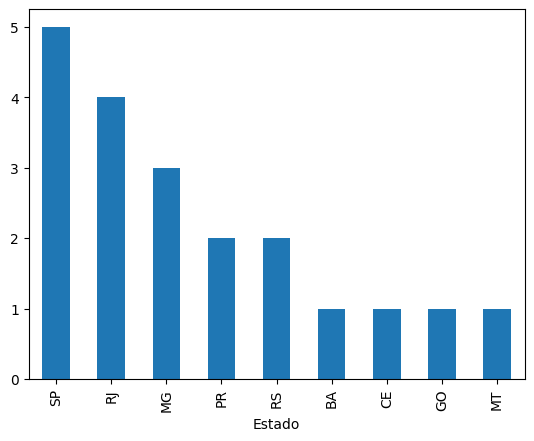

In [ ]:
grafico = part_estados.sort_values(ascending=False)
grafico.plot(kind="bar")

In [ ]:
Estados = tabela_wiki[["Estado", "Equipe"]]

,Estado,Equipe
0,MG,América Mineiro
1,PR,Athletico Paranaense
2,MG,Atlético Mineiro
3,BA,Bahia
4,RJ,Botafogo
5,SP,Corinthians
6,PR,Coritiba
7,MG,Cruzeiro
8,MT,Cuiabá
9,RJ,Flamengo


In [ ]:
part_estados = Estados.groupby(["Estado","Equipe"])
part_estados.first()

Empty DataFrame
Columns: []
Index: [(BA, Bahia), (CE, Fortaleza), (GO, Goiás), (MG, América Mineiro), (MG, Atlético Mineiro), (MG, Cruzeiro), (MT, Cuiabá), (PR, Athletico Paranaense), (PR, Coritiba), (RJ, Botafogo), (RJ, Flamengo), (RJ, Fluminense), (RJ, Vasco da Gama), (RS, Grêmio), (RS, Internacional), (SP, Corinthians), (SP, Palmeiras), (SP, Red Bull Bragantino), (SP, Santos), (SP, São Paulo)]

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


page = requests.get('https://pt.wikipedia.org/wiki/Campeonato_Brasileiro_de_Futebol_de_2023_-_S%C3%A9rie_A').text
soup = BeautifulSoup(page, 'html.parser')
table = soup.find_all('table', class_='wikitable')

df = pd.read_html(str(table))[3]
tabela_participações = pd.DataFrame(df)
tabela_participações

,Pos,Equipevde,Pts,J,V,E,D,GP,GC,SG,Classificação ou descenso
0,1,Palmeiras (C),70,38,20,10,8,64,33,+31,Fase de grupos da Copa Libertadores de 2024
1,2,Grêmio,68,38,21,5,12,63,56,+7,Fase de grupos da Copa Libertadores de 2024
2,3,Atlético Mineiro,66,38,19,9,10,52,32,+20,Fase de grupos da Copa Libertadores de 2024
3,4,Flamengo,66,38,19,9,10,56,42,+14,Fase de grupos da Copa Libertadores de 2024
4,5,Botafogo,64,38,18,10,10,58,37,+21,Segunda fase da Copa Libertadores de 2024
5,6,Red Bull Bragantino,62,38,17,11,10,49,35,+14,Segunda fase da Copa Libertadores de 2024
6,7,Fluminense,56,38,16,8,14,51,47,+4,Fase de grupos da Copa Libertadores de 2024[a]
7,8,Athletico Paranaense,56,38,14,14,10,51,43,+8,Fase de grupos da Copa Sul-Americana de 2024
8,9,Internacional,55,38,15,10,13,46,45,+1,Fase de grupos da Copa Sul-Americana de 2024
9,10,Fortaleza,54,38,15,9,14,45,44,+1,Fase de grupos da Copa Sul-Americana de 2024


In [ ]:
tabela_participações.rename(columns={'Equipevde':'Clubes'}, inplace=True)
# del tabela_participações['Classificação ou descenso']
tabela_participações

,Pos,Clubes,Pts,J,V,E,D,GP,GC,SG
0,1,Palmeiras (C),70,38,20,10,8,64,33,+31
1,2,Grêmio,68,38,21,5,12,63,56,+7
2,3,Atlético Mineiro,66,38,19,9,10,52,32,+20
3,4,Flamengo,66,38,19,9,10,56,42,+14
4,5,Botafogo,64,38,18,10,10,58,37,+21
5,6,Red Bull Bragantino,62,38,17,11,10,49,35,+14
6,7,Fluminense,56,38,16,8,14,51,47,+4
7,8,Athletico Paranaense,56,38,14,14,10,51,43,+8
8,9,Internacional,55,38,15,10,13,46,45,+1
9,10,Fortaleza,54,38,15,9,14,45,44,+1


**Vamos pegar só as informações que nos interessa, por exemplo: Maiores vencedores**

In [ ]:
Maiores_vencedores = tabela_participações[["Clubes","V"]].head(5)
Maiores_vencedores

,Clubes,V
0,Palmeiras (C),20
1,Grêmio,21
2,Atlético Mineiro,19
3,Flamengo,19
4,Botafogo,18


<Axes: xlabel='Clubes'>

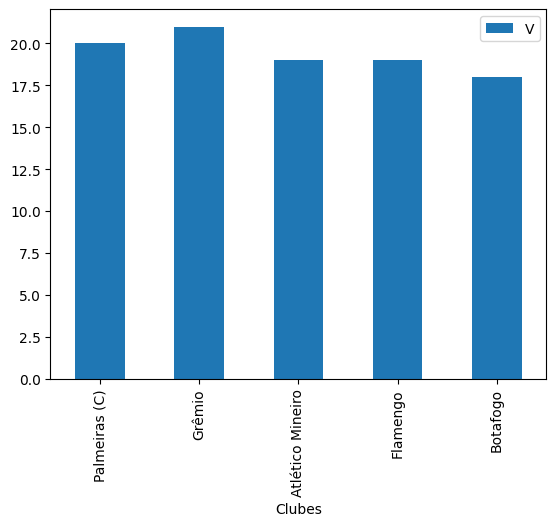

In [ ]:
Maiores_vencedores.plot.bar(x='Clubes', y='V')

**Para encontrarmos os times que menos venceram podemos utilizar o sort_values()**

In [ ]:
Menos_vencedores = tabela_participações[["Clubes","V"]].sort_values(by="V").head(5)
Menos_vencedores

,Clubes,V
19,América Mineiro,5
18,Coritiba,8
17,Goiás,9
16,Santos,11
13,Cruzeiro,11


<Axes: xlabel='Clubes'>

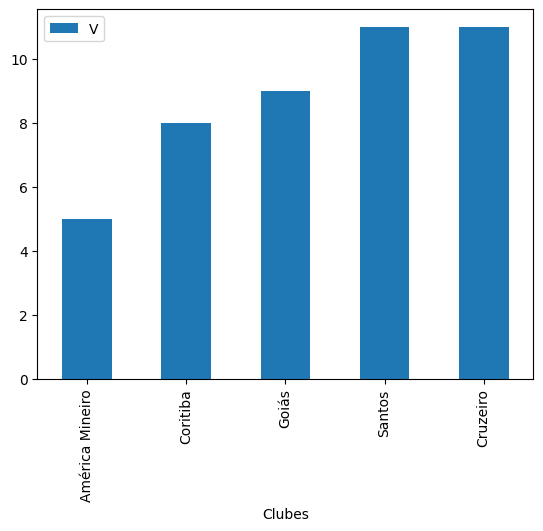

In [ ]:
Menos_vencedores.plot.bar(x='Clubes', y='V')

**O pensamento é o mesmo para encontramos que são os maiores vencedores e perdedores**

In [ ]:
Menos_derrotas = tabela_participações[["Clubes","D"]].head(5)
Menos_derrotas

,Clubes,D
0,Palmeiras (C),8
1,Grêmio,12
2,Atlético Mineiro,10
3,Flamengo,10
4,Botafogo,10


In [ ]:
Mais_derrotas = tabela_participações[["Clubes","D"]].sort_values(by="D",ascending=False).head(5)
Mais_derrotas

,Clubes,D
19,América Mineiro,24
18,Coritiba,24
17,Goiás,18
15,Bahia,18
16,Santos,17


<h2> Agora vamos criar novas colunas em nossa tabela para conhecermos informações importantes como: </h2>

* Aproveitamento das equipes
* Percentual de vitórias e derrotas

In [ ]:
tabela_participações

,Pos,Clubes,Pts,J,V,E,D,GP,GC,SG
0,1,Palmeiras (C),70,38,20,10,8,64,33,+31
1,2,Grêmio,68,38,21,5,12,63,56,+7
2,3,Atlético Mineiro,66,38,19,9,10,52,32,+20
3,4,Flamengo,66,38,19,9,10,56,42,+14
4,5,Botafogo,64,38,18,10,10,58,37,+21
5,6,Red Bull Bragantino,62,38,17,11,10,49,35,+14
6,7,Fluminense,56,38,16,8,14,51,47,+4
7,8,Athletico Paranaense,56,38,14,14,10,51,43,+8
8,9,Internacional,55,38,15,10,13,46,45,+1
9,10,Fortaleza,54,38,15,9,14,45,44,+1


<h3> Para calcular o aproveitamento vamos utilizar a seguinte relação: Pontos/(Jogos*3). Assim podemos calcular o quanto o time pontuo considerando os pontos totais possiveis, que são 38*3 = 74. </h3>

<h3> Já o percentual de vitórias e derrotas será: Vitórias/Jogos e Derrotas/Jogos. </h3>

In [ ]:
# Calculando o aproveitamento de cada equipe
tabela_participações["Apt%"] = round(tabela_participações["Pts"] / (tabela_participações["J"] * 3),2)
tabela_participações["V%"] = round(tabela_participações["V"] / (tabela_participações["J"]),2)
tabela_participações["D%"] = round(tabela_participações["D"] / (tabela_participações["J"]),2)
tabela_participações.head(5)

,Pos,Clubes,Pts,J,V,E,D,GP,GC,SG,Apt%,V%,D%
0,1,Palmeiras (C),70,38,20,10,8,64,33,+31,0.61,0.53,0.21
1,2,Grêmio,68,38,21,5,12,63,56,+7,0.60,0.55,0.32
2,3,Atlético Mineiro,66,38,19,9,10,52,32,+20,0.58,0.50,0.26
3,4,Flamengo,66,38,19,9,10,56,42,+14,0.58,0.50,0.26
4,5,Botafogo,64,38,18,10,10,58,37,+21,0.56,0.47,0.26


<h3> Agora vamos calcular algumas médias interessantes como: </h3>

* Média de gols pró por equipe => GP/Jogos

* Média de gols contra por equipe => GC/Jogos

In [ ]:
tabela_Medias = tabela_participações[["Clubes"]]
tabela_Medias["Media-GP"] = round(tabela_participações["GP"]/tabela_participações["J"],2)
tabela_Medias["Media-GC"] = round(tabela_participações["GC"]/tabela_participações["J"],2)
tabela_Medias.head(10)

<ipython-input-57-659927428030>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_Medias["Media-GP"] = round(tabela_participações["GP"]/tabela_participações["J"],2)
<ipython-input-57-659927428030>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_Medias["Media-GC"] = round(tabela_participações["GC"]/tabela_participações["J"],2)


,Clubes,Media-GP,Media-GC
0,Palmeiras (C),1.68,0.87
1,Grêmio,1.66,1.47
2,Atlético Mineiro,1.37,0.84
3,Flamengo,1.47,1.11
4,Botafogo,1.53,0.97
5,Red Bull Bragantino,1.29,0.92
6,Fluminense,1.34,1.24
7,Athletico Paranaense,1.34,1.13
8,Internacional,1.21,1.18
9,Fortaleza,1.18,1.16


<h3> Agora podemos calcular a média do campeonato e comparar com a média dos clubes </h3>

In [ ]:
Media_GP = tabela_participações["GP"].sum()
Media_GP

946

In [ ]:
jogos = 38

In [ ]:
Jogos_Rodada = jogos*((tabela_participações["Clubes"].count())/2)
Jogos_Rodada

380.0

In [ ]:
Media_GP_Camp = round(Media_GP/Jogos_Rodada,2)
Media_GP_Camp

2.49

In [ ]:
tabela_Medias['Media_Relativa'] = round(tabela_Medias['Media-GP'] / Media_GP_Camp,2)
tabela_Medias.head(10)

<ipython-input-62-5f83b63b73c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_Medias['Media_Relativa'] = round(tabela_Medias['Media-GP'] / Media_GP_Camp,2)


,Clubes,Media-GP,Media-GC,Media_Relativa
0,Palmeiras (C),1.68,0.87,0.67
1,Grêmio,1.66,1.47,0.67
2,Atlético Mineiro,1.37,0.84,0.55
3,Flamengo,1.47,1.11,0.59
4,Botafogo,1.53,0.97,0.61
5,Red Bull Bragantino,1.29,0.92,0.52
6,Fluminense,1.34,1.24,0.54
7,Athletico Paranaense,1.34,1.13,0.54
8,Internacional,1.21,1.18,0.49
9,Fortaleza,1.18,1.16,0.47


In [70]:
def Eficiencia_Ataque(x):
  if x == 1:
    return "Ataque Muito Eficente"
  elif 0.50 < x < 1:
    return "Boa Eficiencia"
  elif 0.40 < x <= 0.50:
    return "Pouco Eficiente"
  else:
    return "Inefiente"

tabela_Medias["Eficiência"] = tabela_Medias['Media_Relativa'].apply(Eficiencia_Ataque)
tabela_Medias

<ipython-input-70-6b9552f06873>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_Medias["Eficiência"] = tabela_Medias['Media_Relativa'].apply(Eficiencia_Ataque)


,Clubes,Media-GP,Media-GC,Media_Relativa,Eficiência
0,Palmeiras (C),1.68,0.87,0.67,Boa Eficiencia
1,Grêmio,1.66,1.47,0.67,Boa Eficiencia
2,Atlético Mineiro,1.37,0.84,0.55,Boa Eficiencia
3,Flamengo,1.47,1.11,0.59,Boa Eficiencia
4,Botafogo,1.53,0.97,0.61,Boa Eficiencia
5,Red Bull Bragantino,1.29,0.92,0.52,Boa Eficiencia
6,Fluminense,1.34,1.24,0.54,Boa Eficiencia
7,Athletico Paranaense,1.34,1.13,0.54,Boa Eficiencia
8,Internacional,1.21,1.18,0.49,Pouco Eficiente
9,Fortaleza,1.18,1.16,0.47,Pouco Eficiente


<h2>Quantos times estiveram na liderança </h2>

In [ ]:
df = pd.read_html(str(table))[5]
tabela_lideres = pd.DataFrame(df)
tabela_lideres.head(10)

,Rodada ↓,AMM,ATP,ATM,BAH,BOT,COR,CTB,CRU,CUI,...,FLU,FOR,GOI,GRE,INT,PAL,RBB,SAN,SPA,VAS
0,1ª,20,3,15,12,4,6,19,13,16,...,1,10,18,9,10,7,4,17,13,8
1,2ª,20,11,16,18,2,14,19,12,15,...,1,3,10,13,6,4,7,17,9,5
2,3ª,20,16,10,14,1,17,19,6,18,...,5,2,15,7,4,3,12,11,8,9
3,4ª,20,10,16,9,1,15,19,3,13,...,6,4,18,7,8,2,12,14,5,11
4,5ª,20,4,8,13,1,16,19,4,17,...,3,6,18,10,11,2,15,9,7,14
5,6ª,20,5,6,14,1,17,19,4,18,...,3,8,15,11,12,2,13,7,10,16
6,7ª,19,7,4,13,1,18,20,5,14,...,3,11,16,10,15,2,12,9,8,17
7,8ª,19,11,4,16,1,14,20,6,15,...,8,9,17,5,13,2,10,12,3,18
8,9ª,18,7,3,15,1,16,20,10,14,...,6,9,17,4,13,2,11,12,8,19
9,10ª,18,7,4,15,1,16,20,9,14,...,5,11,17,6,10,2,12,13,8,19


In [ ]:
tabela_lideres = tabela_lideres[["BOT","FLU"]]
BOT = tabela_lideres[["BOT"]] == "1"
BOT.sum()

BOT    31
dtype: int64

In [ ]:
tabela_lideres = tabela_lideres[["BOT","FLU"]]
Flu = tabela_lideres[["FLU"]] == "1"
Flu.sum()

FLU    2
dtype: int64

In [ ]:
tabela_lideres = tabela_lideres[["PAL"]]
Pal = tabela_lideres[["PAL"]] == "1"
Pal.sum()

PAL    5
dtype: int64

In [ ]:
tabela_lideres = tabela_lideres[["BOT","FLU","PAL"]]
LIDER = tabela_lideres[["BOT","FLU","PAL"]]== 1
LIDER

,BOT,FLU,PAL
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [ ]:
LIDER.sum()

BOT    31
FLU     2
PAL     5
dtype: int64

<Axes: >

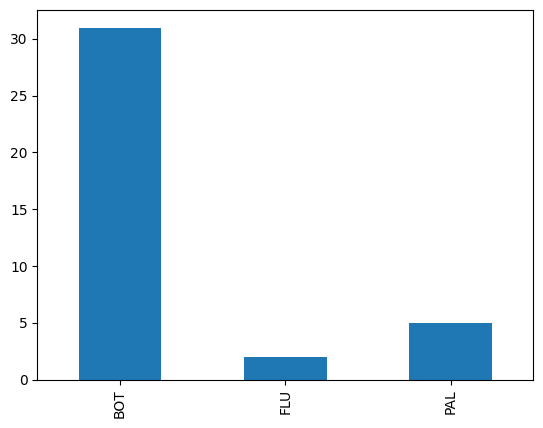

In [ ]:
GRAFICO = LIDER.sum()
GRAFICO.plot(kind="bar")

In [ ]:
LANTERNA = tabela_lideres[["AMM","CTB","VAS"]]=="20"
LANTERNA.sum()

AMM    25
CTB    11
VAS     2
dtype: int64

<Axes: >

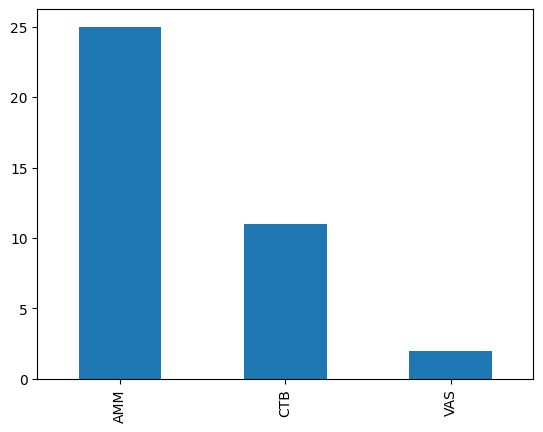

In [ ]:
GRAFICO = LANTERNA.sum()
GRAFICO.plot(kind="bar")

In [ ]:
# mask = (tabela_lideres[["BOT","FLU","PAL"]] == "1")

# # Apply the mask to the DataFrame
# LIDER = tabela_lideres[mask]
# LIDER

,BOT,FLU,PAL
0,NaN,1,NaN
1,NaN,1,NaN
2,1,NaN,NaN
3,1,NaN,NaN
4,1,NaN,NaN
5,1,NaN,NaN
6,1,NaN,NaN
7,1,NaN,NaN
8,1,NaN,NaN
9,1,NaN,NaN
